In [25]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
import random

In [195]:
df = pd.read_csv("housing_prices.csv")
df = df[pd.notnull(df["Price"])]
df = df[pd.notnull(df["Regionname"])]
df2 = df.drop("Price", 1)


In [196]:
df2.head()
#we have a lot of NaNs that need to be solved
#another question is do we need to somehow include address? does that matter? let's leave it out for now 

#so we left it out and didn't get far. we need to OHE


dd = pd.get_dummies(df2[["Regionname"]])
df2 = df2.join(dd)
suburb = pd.get_dummies(df2[["Suburb"]])
df2 = df2.join(suburb)

In [197]:

df2 = df2.drop("Address", 1)
df2 = df2.drop("Type", 1)
df2 = df2.drop("Method", 1)
df2 = df2.drop("SellerG", 1)
df2 = df2.drop("Propertycount", 1)


In [232]:
#df2 = df2.drop("CouncilArea", 1)
#df2 = df2.drop("Regionname", 1)
#df2 = df2.drop("Suburb", 1)
#df3 = df3.drop("Regionname", 1)
df3 = df3.drop("Suburb", 1)

In [199]:
df2 = df2.drop("Date", 1)

In [200]:
#let's go from left to right. first, let's find out which columns have a nan
df2.isna().any()

Suburb                                   False
Rooms                                    False
Distance                                 False
Postcode                                 False
Bedroom2                                  True
Bathroom                                  True
Car                                       True
Landsize                                  True
BuildingArea                              True
YearBuilt                                 True
Lattitude                                 True
Longtitude                                True
Regionname                               False
Regionname_Eastern Metropolitan          False
Regionname_Eastern Victoria              False
Regionname_Northern Metropolitan         False
Regionname_Northern Victoria             False
Regionname_South-Eastern Metropolitan    False
Regionname_Southern Metropolitan         False
Regionname_Western Metropolitan          False
Regionname_Western Victoria              False
Suburb_Abbots

In [201]:
df2["Distance"].describe()
df2["Distance"] = df2["Distance"].fillna(random.uniform(df2["Distance"].mean() - df2["Distance"].std(), df2["Distance"].mean() + df2["Distance"].std()))

In [202]:
df2["Bedroom2"] = df2["Bedroom2"].fillna(0)

In [203]:
df2["Bathroom"] = df2["Bathroom"].fillna(0)

In [204]:
df2["Car"] = df2["Car"].fillna(0)

In [205]:
#there is a big outlier here is affecting the std. We're going to use to the mean instead
df2["Landsize"] = df2["Landsize"].fillna(df2["Landsize"].mean())

In [206]:
#same as above
df2["BuildingArea"] = df2["BuildingArea"].fillna(df2["BuildingArea"].mean())

In [207]:
df2["YearBuilt"].describe()
df2["YearBuilt"] = df2["YearBuilt"].fillna(df2["YearBuilt"].mean())

In [208]:
#fix spelling
df2["Latitude"] = df2["Lattitude"]
df2 = df2.drop("Lattitude", 1)


In [209]:
df2["Latitude"].describe()
df2["Latitude"] = df2["Latitude"].fillna(random.uniform(df2["Latitude"].mean() - df2["Latitude"].std(), df2["Latitude"].mean() + df2["Latitude"].std()))

In [210]:
df2["Longitude"] = df2["Longtitude"]
df2 = df2.drop("Longtitude", 1)

In [211]:
df2["Longitude"].describe()
df2["Longitude"] = df2["Longitude"].fillna(random.uniform(df2["Longitude"].mean() - df2["Longitude"].std(), df2["Longitude"].mean() + df2["Longitude"].std()))

In [212]:
df2["Rooms_Bathroom"] = df2["Rooms"] * df2["Bathroom"]

In [213]:
df2["RoomsSq"] = df2["Rooms"] ** 2

In [214]:
df2["LandsizeSq"] = df2["Landsize"] ** 2
df2["Rooms_Landsize"] = df2["Rooms"] ** df2["Landsize"]

In [215]:
df2= df2.drop("Rooms_Landsize", 1)

In [128]:
#drop this
df2["BuildingAreaSq"] = df2["BuildingArea"] ** 2

In [216]:
df2["BuildingArea_Landsize"] = df2["BuildingArea"] * df2["Landsize"]

In [217]:
df2["Bedroom2Sq"] = df2["Bedroom2"] ** 2

In [142]:
#df2.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt',
       'Regionname_Eastern Metropolitan',
       ...
       'Suburb_croydon', 'Suburb_viewbank', 'Latitude', 'Longitude',
       'Rooms_Bathroom', 'RoomsSq', 'LandsizeSq', 'BuildingAreaSq',
       'BuildingArea_Landsize', 'Bedroom2Sq'],
      dtype='object', length=369)

0.455649410291


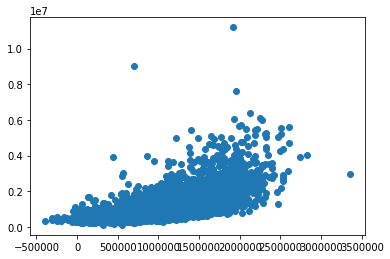

In [313]:
#the first model that jumps out at me is linear regression. A lot of talk about housing prices having a
#linear relationship. 
from sklearn.linear_model import LinearRegression
regr = LinearRegression()


x = df3

y = df["Price"]


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.33)

#fit model
regr.fit(X_train,Y_train)

#predict x
pred = regr.predict(X_test)

#how much variance are we explaining?
print(regr.score(X_test,Y_test))  

#which features should we keep?
#print(regr.coef_)

#what type of errors are we getting? 
print(plt.scatter(pred,Y_test))

In [307]:
#let's check for overfitting
#from sklearn.model_selection import cross_val_score

#cross_val_score(regr, X_test, Y_test, cv=10)

In [314]:
params = {'n_estimators': 100,
          'subsample' : .7,
          'max_depth' : 5
          
          }
regr2 = ensemble.GradientBoostingRegressor(** params)

% time regr2.fit(X_train, Y_train)
pred2 = regr2.predict(X_test)
print(regr2.feature_importances_)
print('\n Accuracy by admission status')
print(regr2.score(X_test, Y_test))

Wall time: 1.08 s
[ 0.13112921  0.2457592   0.27150378  0.08364524  0.13018145  0.13778112]

 Accuracy by admission status
0.665646376735


In [309]:
#small > largest 
test = regr2.feature_importances_
test = pd.Series(test)
test2 = pd.concat([pd.Series(df3.columns),test],axis=1)


In [310]:
test2.columns = ["Features", "Importance"]

In [311]:

test3 = test2[test2["Importance"] <= 0.03]
test3["Features"]


2                                  Postcode
3                                  Bedroom2
4                                  Bathroom
5                                       Car
6                                  Landsize
7                              BuildingArea
8                                 YearBuilt
9           Regionname_Eastern Metropolitan
10         Regionname_Northern Metropolitan
11    Regionname_South-Eastern Metropolitan
13                        Suburb_Aberfeldie
14                       Suburb_Albert Park
15                            Suburb_Altona
16                          Suburb_Armadale
17                           Suburb_Ashwood
18                            Suburb_Balwyn
19                         Suburb_Beaumaris
20                         Suburb_Blackburn
21                          Suburb_Box Hill
22                          Suburb_Brighton
23                     Suburb_Brighton East
24                    Suburb_Brunswick West
25                           Sub

In [312]:
df3 = df3.drop(test3["Features"], 1) 
df3

,Rooms,Distance,Regionname_Southern Metropolitan,Rooms_Bathroom,RoomsSq,BuildingArea_Landsize
1,2,2.5,0,2.0,4,31680.586283
2,2,2.5,0,2.0,4,12324.000000
4,3,2.5,0,6.0,9,20100.000000
5,3,2.5,0,6.0,9,14742.451042
6,4,2.5,0,4.0,16,17040.000000
10,2,2.5,0,2.0,4,28387.059986
11,3,2.5,0,6.0,9,51450.000000
14,2,2.5,0,2.0,4,27392.000000
15,3,2.5,0,0.0,9,93079.590899
16,2,2.5,0,0.0,4,93079.590899


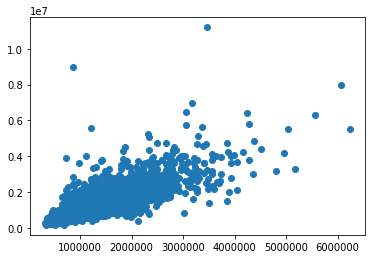

In [145]:
plt.scatter(pred2, Y_test)

In [141]:
#let's check for overfitting
from sklearn.model_selection import cross_val_score

cross_val_score(regr2, X_test, Y_test, cv=5)

array([ 0.68104944,  0.72027188,  0.75472808,  0.70369757,  0.7347901 ])

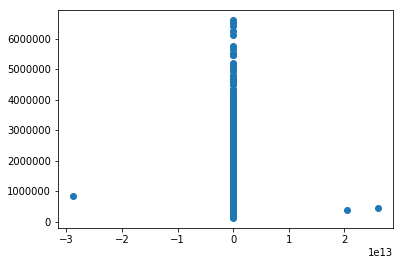

In [82]:
axes = plt.gca()

plt.scatter(pred2,Y_test)


In [78]:
params = {'n_estimators': 500,
          'max_depth': 5
          }
regr2 = ensemble.RandomForestRegressor(** params)

regr2.fit(X_train, Y_train)
pred2 = regr2.predict(X_test)

print('\n Accuracy by admission status')
print(regr2.score(X_test, Y_test))


 Accuracy by admission status
0.627295846092


In [79]:
from sklearn.svm import SVR
svr = SVR()
% time fit_svr = svr.fit(X_train, Y_train)

pred_svr = fit_svr.predict(X_test)

print('\n Accuracy by admission status')
#print(pd.crosstab(predict_test, Y_test))

print('\n Percentage accuracy')
print(svr.score(X_test, Y_test))


c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 3min 45s

 Accuracy by admission status

 Percentage accuracy
-0.0883062044698


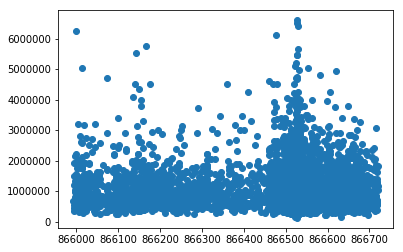

In [83]:
pred2
plt.scatter(pred_svr,Y_test)

In [22]:
df2["Price"] = df["Price"]

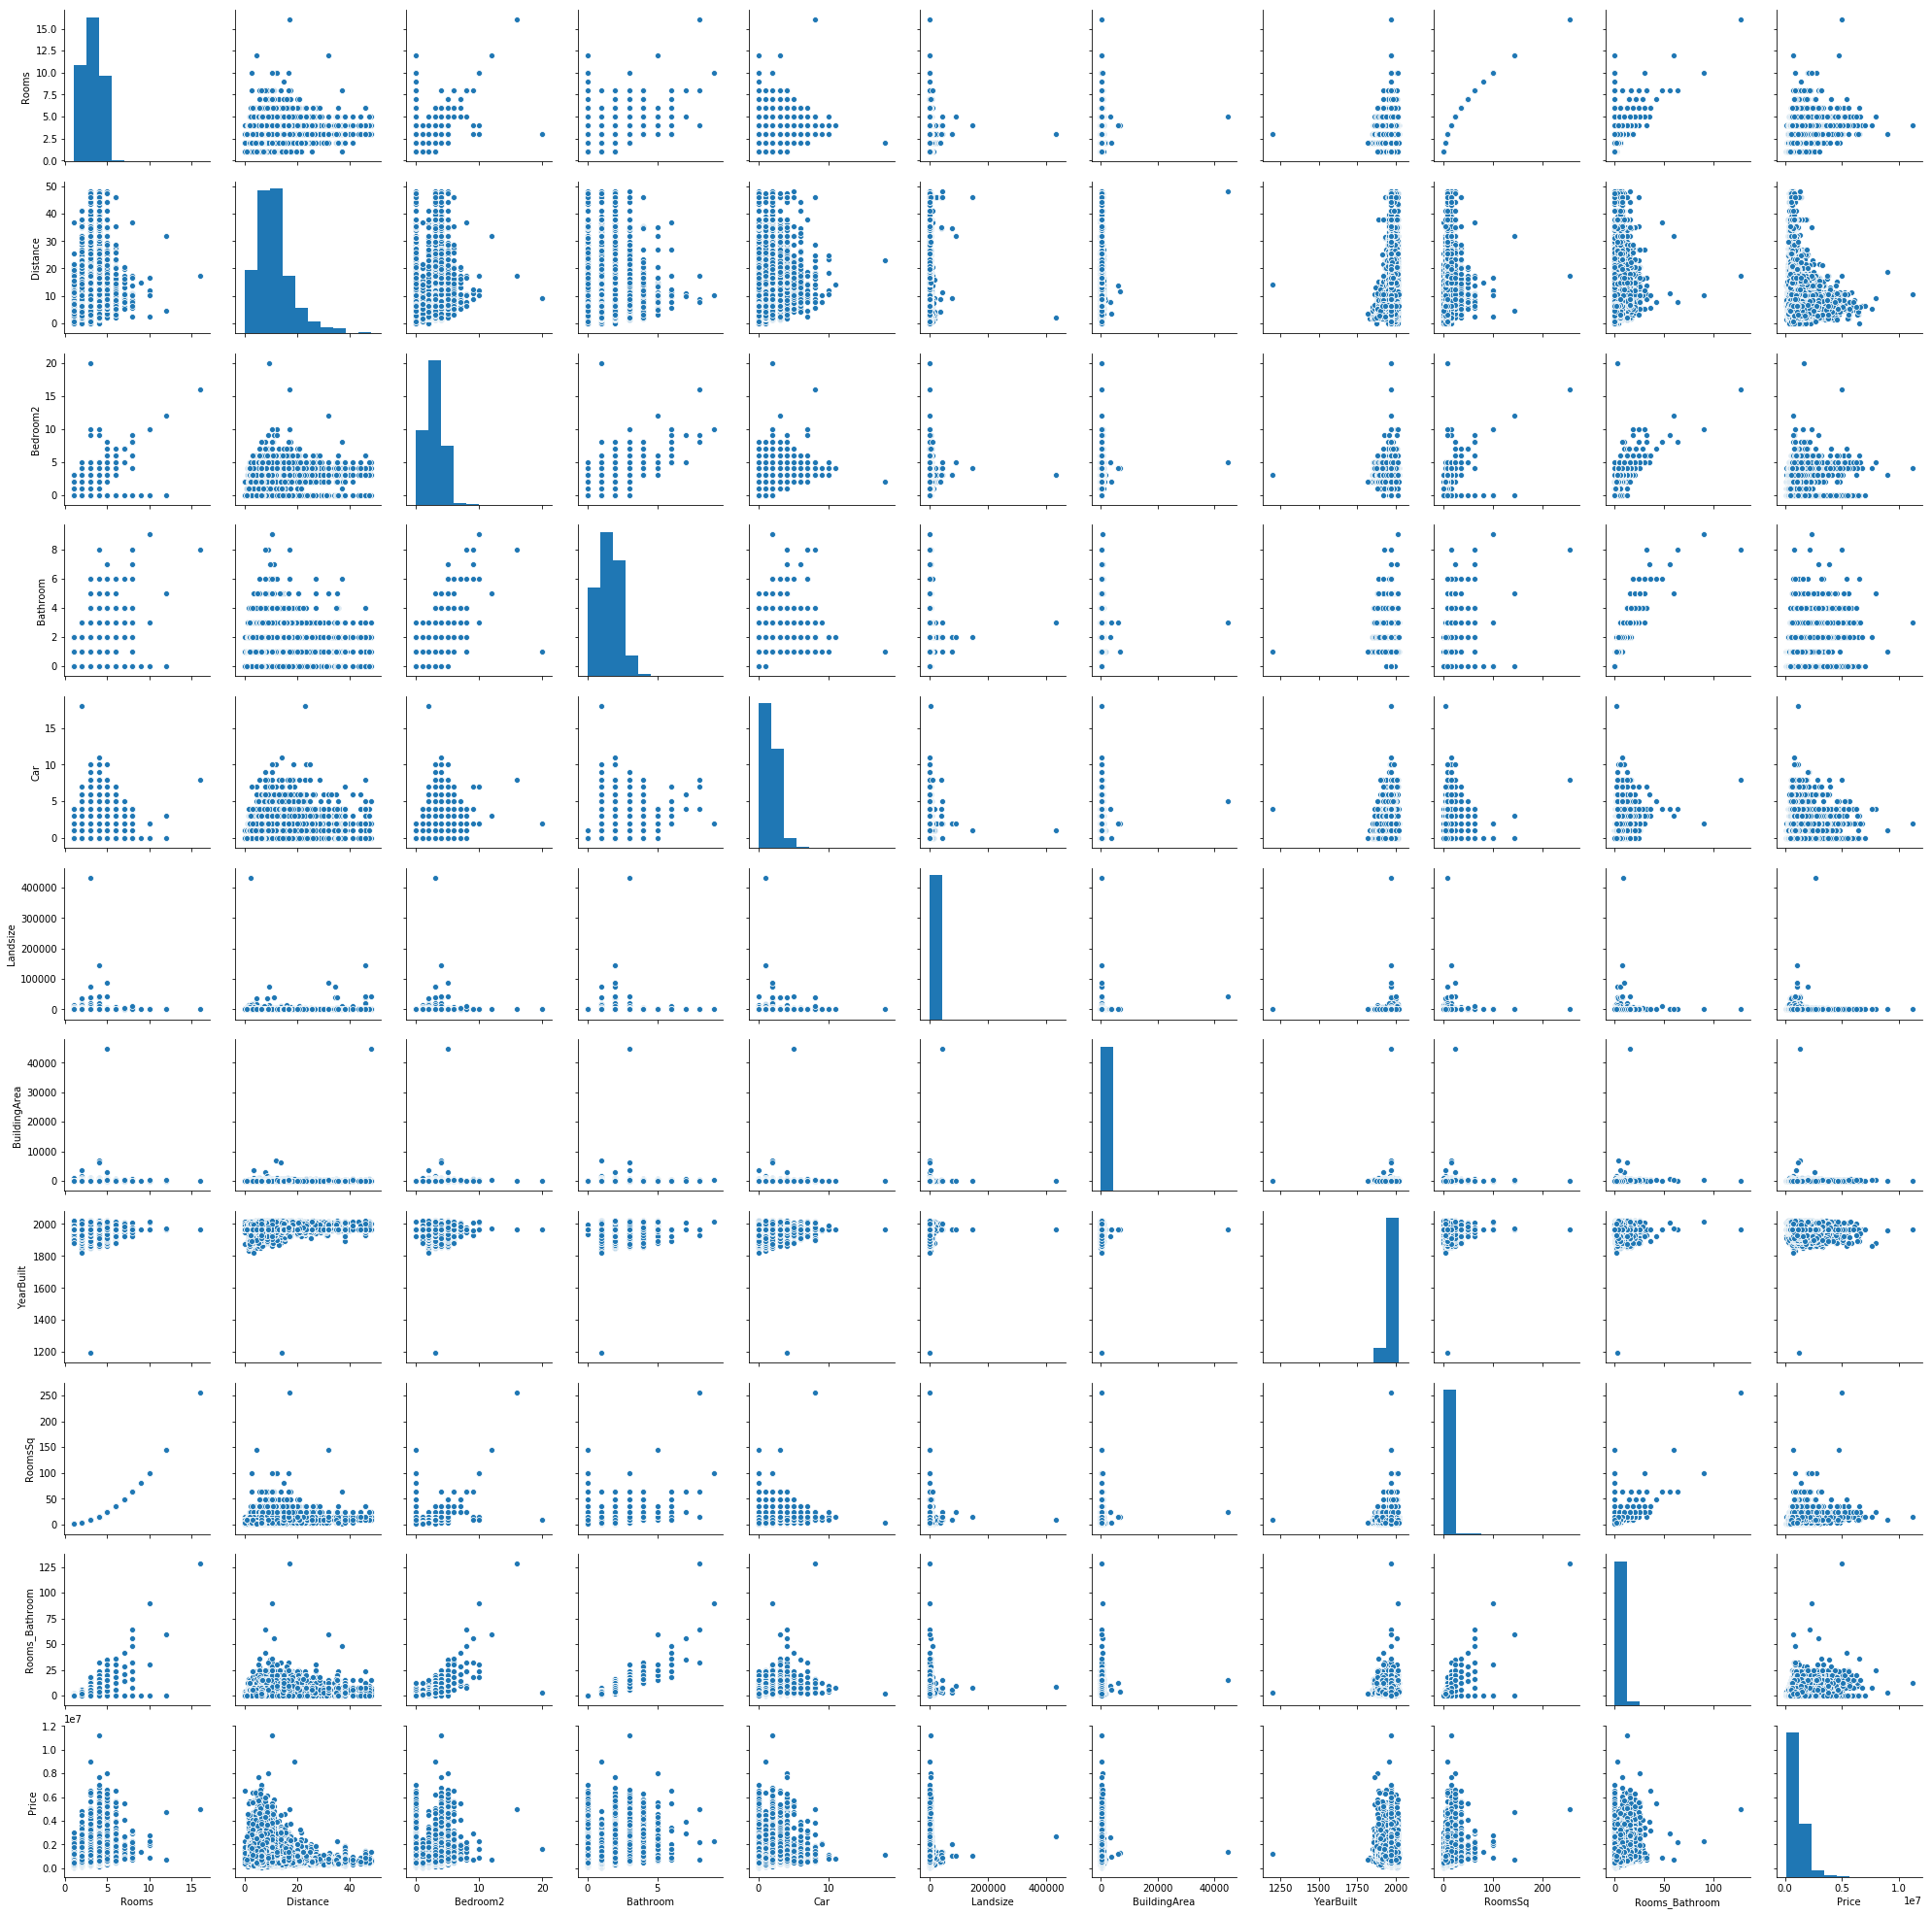

In [23]:
sns.pairplot(df2[["Rooms", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "RoomsSq"
                  ,"Rooms_Bathroom" ,"Price"]])

In [172]:
df2

0                                      Rooms
1                                   Distance
2                                   Postcode
3                                   Bedroom2
4                                   Bathroom
5                                        Car
6                                   Landsize
7                               BuildingArea
8                                  YearBuilt
9            Regionname_Eastern Metropolitan
10               Regionname_Eastern Victoria
11          Regionname_Northern Metropolitan
12              Regionname_Northern Victoria
13     Regionname_South-Eastern Metropolitan
14          Regionname_Southern Metropolitan
15           Regionname_Western Metropolitan
16               Regionname_Western Victoria
17                         Suburb_Abbotsford
18                         Suburb_Aberfeldie
19                       Suburb_Airport West
20                          Suburb_Albanvale
21                        Suburb_Albert Park
22        